This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

**hotel** - The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel.

**is_canceled** - Value indicating if the booking was canceled (1) or not (0).

**lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

**arrival_date_year** - Year of arrival date.

**arrival_date_month** - Month of arrival date with 12 categories: “January” to “December”

**arrival_date_week_number** - Week number of the arrival date

**arrival_date_day_of_month** - Day of the month of the arrival date

**stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights.

**adults** - Number of adults

**children** - Number of children

**babies** - Number of babies

**meal** - BB – Bed & Breakfast

**country** - Country of origin.

**market_segment** - Market segment designation. 
* TA - Travel Agents 
* TO - Tour Operators

**distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons

**assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

**booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

 **deposit_type** 
 * No Deposit – no deposit was made; 
 * Non Refund – a deposit was made in the value of the total stay cost; 
 * Refundable – a deposit was made with a value under the total cost of stay.
 
**agent** - ID of the travel agency that made the booking

**company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type** 
* Group – when the booking is associated to a group; 
* Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr** - Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)

**required_car_parking_spaces** - Number of car parking spaces required by the customer

**total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status** 
* Check-Out – customer has checked in but already departed; 
* No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")
import calendar

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,  RidgeClassifier
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier
from catboost import Pool, CatBoostClassifier #CatBoost
from lightgbm import * 
import scikitplot as skplt

In [2]:
data = pd.read_csv("../datasets/hotel_booking.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


First at all check size and drop duplicates

In [3]:
def size_of_df(data):
    print(f"| {data.shape[0]} rows, {data.shape[1]} columns \n| {data.size} elements summary \n| {round(data.memory_usage().sum()/1048576, 1)} Mb")

In [4]:
size_of_df(data)

| 119390 rows, 36 columns 
| 4298040 elements summary 
| 32.8 Mb


In [5]:
data.drop_duplicates(inplace=True, ignore_index=True)
size_of_df(data)

| 119390 rows, 36 columns 
| 4298040 elements summary 
| 32.8 Mb


Create function for display information about DF

In [6]:
def data_info(data, set_color=False):
    #  most popular unique values in DF
    unique_data = [data[x].value_counts().index[:2] for x in data.columns]
    unique_res_data = pd.DataFrame()
    for index, x in enumerate(data.columns):
        unique_res_data[x] = unique_data[index] 
        
    #  create new DF with all information about our DF - unique values, data types, num. unique values, num. NAs    
    df_info = pd.concat([unique_res_data, 
                     pd.DataFrame(data.dtypes).T, 
                     pd.DataFrame(data.nunique()).T, 
                     pd.DataFrame(data.isna().sum()).T], ignore_index=True)

    df_info.rename(index={0:"unique_value_1",
                          1:"unique_value_2",
                          2:"type", 
                          3:"num_unique", 
                          4:"is_na"}, inplace=True)
    
    # for convenience highlight the information in color
    if set_color:
        props = [("background-color", "lavender")]
        df_info = df_info.style.set_table_styles({"type": [{"selector": "", "props": props}],
                                          "num_unique": [{"selector": '', "props": props}],
                                          "is_na": [{"selector": "", "props": props}]}, 
                                          axis=1, 
                                          overwrite=False)
    return(df_info)

In [7]:
data_info(data).T

,unique_value_1,unique_value_2,type,num_unique,is_na
hotel,City Hotel,Resort Hotel,object,2,0
is_canceled,0,1,int64,2,0
lead_time,0,1,int64,479,0
arrival_date_year,2016,2017,int64,3,0
arrival_date_month,August,July,object,12,0
arrival_date_week_number,33,30,int64,53,0
arrival_date_day_of_month,17,5,int64,31,0
stays_in_weekend_nights,0,2,int64,17,0
stays_in_week_nights,2,1,int64,35,0
adults,2,1,int64,14,0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
# drop orders with options "adults" = 0 (or > quantile = 0.99) and some rows with miss values
data = data[~((data.children.isna()) | (data.country.isna()))]
data = data[data.adults>0]
data = data[data.adults<data.adults.quantile(0.99)]

Who are the most common customers by each hotel

In [10]:
pd.concat([data[data.hotel=='Resort Hotel'].name.value_counts().head(), 
           data[data.hotel=='City Hotel'].name.value_counts().head()], 
           axis=1, keys=("Resort Hotel", "City Hotel")).fillna("-")

,Resort Hotel,City Hotel
Robert Smith,20.0,-
John Smith,19.0,26.0
Christopher Smith,15.0,28.0
Michael Johnson,15.0,30.0
Jennifer Smith,13.0,-
Michael Smith,-,33.0
James Smith,-,30.0


In [11]:
# data22 = pd.DataFrame(data.groupby(['hotel', 'name']).size()).reset_index().sort_values(0, ascending=False)
# data22

What country is the most popular by each hotel

In [12]:
pd.concat([data[data.hotel=='Resort Hotel'].country.value_counts().head(), 
           data[data.hotel=='City Hotel'].country.value_counts().head()], 
           axis=1, keys=("Resort Hotel", "City Hotel")).fillna("-")

,Resort Hotel,City Hotel
PRT,16968.0,30158.0
GBR,6571.0,4883.0
ESP,3790.0,4125.0
IRL,2088.0,-
FRA,1564.0,8049.0
DEU,-,5670.0


In [13]:
# add column babies to children
data["children"] = data.babies + data.children

In [14]:
# drop excess data
data.drop(["company", "name", "email", "phone-number", "agent", "credit_card", 
           "distribution_channel", "babies", "assigned_room_type", "reservation_status", "reservation_status_date"], 
          axis=1, inplace=True)

In [15]:
data_info(data, True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
unique_value_1,City Hotel,0,0,2016,August,33,17,0,2,2,0.000000,BB,PRT,Online TA,0,0,0,A,0,No Deposit,0,Transient,62.000000,0,0
unique_value_2,Resort Hotel,1,1,2017,July,18,5,2,1,1,1.000000,HB,GBR,Offline TA/TO,1,1,1,D,1,Non Refund,39,Transient-Party,75.000000,1,1
type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,float64,object,object,object,int64,int64,int64,object,int64,object,int64,object,float64,int64,int64
num_unique,2,2,479,3,12,53,31,15,31,2,6,5,175,7,2,15,73,9,19,3,127,4,8212,5,6
is_na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#  change data types
cat_data = ["hotel", "is_canceled", "arrival_date_month", "meal", "market_segment", 
      "is_repeated_guest", "reserved_room_type", "country", 
      "deposit_type", "customer_type"]
int_data = ["children", "adr"]

# data[cat_data] = data[cat_data].astype("category")
data[int_data] = data[int_data].astype("int")

Check DF size after transformations (32.8 Mb before)

In [17]:
size_of_df(data)

| 112230 rows, 25 columns 
| 2805750 elements summary 
| 21.4 Mb


In [18]:
data_info(data, True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
unique_value_1,City Hotel,0,0,2016,August,33,17,0,2,2,0,BB,PRT,Online TA,0,0,0,A,0,No Deposit,0,Transient,62,0,0
unique_value_2,Resort Hotel,1,1,2017,July,18,5,2,1,1,1,HB,GBR,Offline TA/TO,1,1,1,D,1,Non Refund,39,Transient-Party,90,1,1
type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,int32,object,object,object,int64,int64,int64,object,int64,object,int64,object,int32,int64,int64
num_unique,2,2,479,3,12,53,31,15,31,2,6,5,175,7,2,15,73,9,19,3,127,4,368,5,6
is_na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data.is_canceled.value_counts()

0    70358
1    41872
Name: is_canceled, dtype: int64

In [20]:
print(f"We have {round(data.is_canceled.value_counts()[1]/len(data.is_canceled)*100, 2)}% cancels total")

We have 37.31% cancels total


Look at dependencies by "is_canceled"

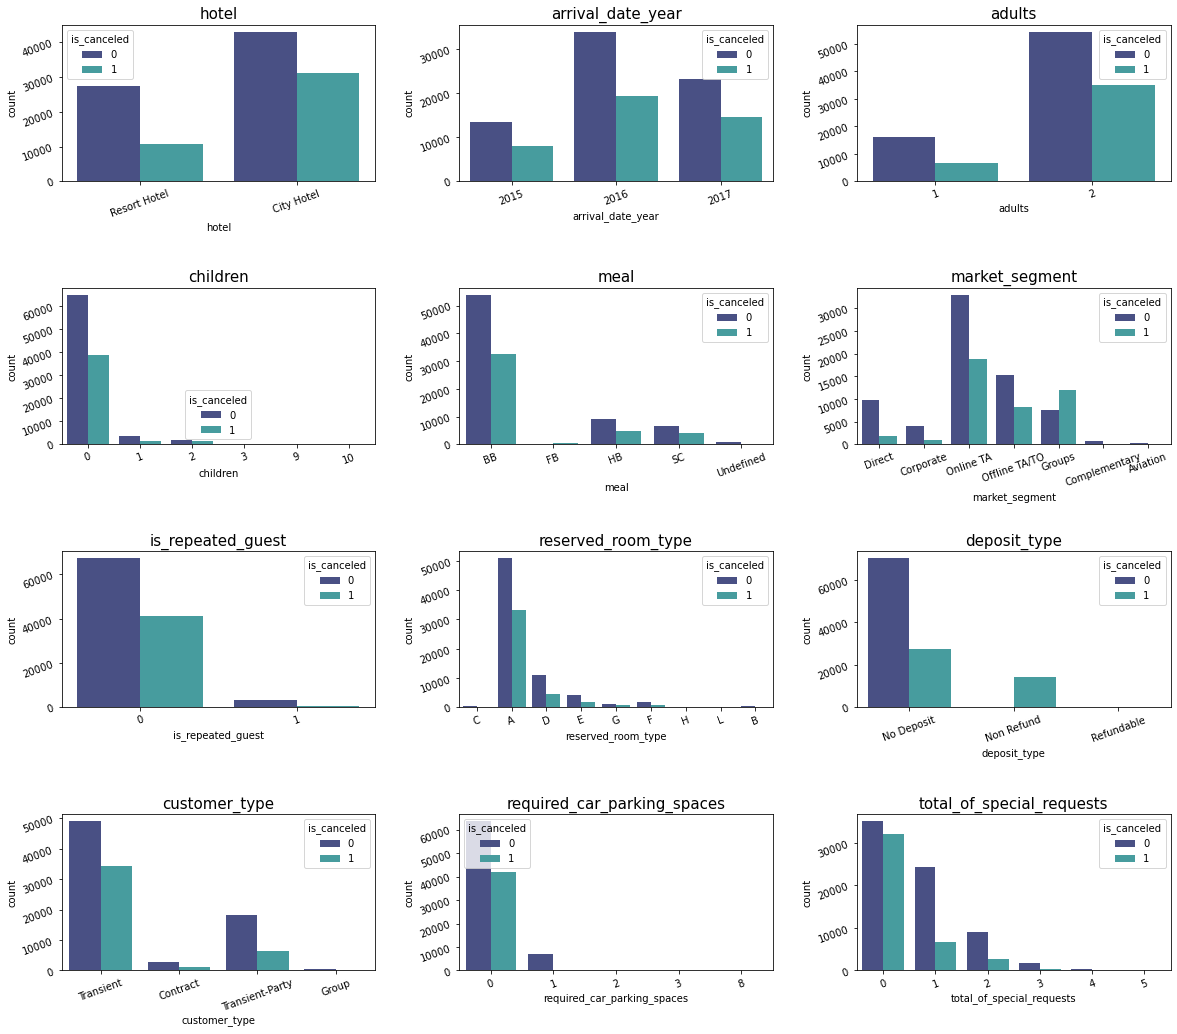

In [21]:
columns_for_visual = data.nunique()[data.nunique()<10].drop(["is_canceled"]).index
fig = plt.figure(figsize=(17,15))
for index, col in enumerate(columns_for_visual):
    ax = fig.add_subplot(4, 3, index+1)
    ax.set_title(col,fontsize=15)
    ax.tick_params(labelrotation=20)
    sns.countplot(data[col], hue=data.is_canceled, ax=ax, palette="mako")
plt.tight_layout(pad=3);

We can see some intresting columns - "hotel", "market_segment", "is_repeated_guest", "deposit_type", "customer_type"

Look at the data with percentages

In [22]:
def perc_canceled_for_cols(data, *cols):
    result_data = pd.DataFrame()
    for col in cols:
        temp_df = data.pivot_table(index="is_canceled", columns=col, aggfunc="count").adr\
                            .reset_index().drop("is_canceled", axis=1).apply(lambda x: round(x/x.sum()*100, 2))
        result_data = pd.concat([result_data, temp_df], axis=1)
    return result_data

In [23]:
hotel_market = perc_canceled_for_cols(data, "hotel", "market_segment")
hotel_market

,City Hotel,Resort Hotel,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
0,57.91,71.98,77.87,87.76,80.85,84.6,38.28,65.21,63.66
1,42.09,28.02,22.13,12.24,19.15,15.4,61.72,34.79,36.34


In [24]:
repeat_deposit = perc_canceled_for_cols(data, "is_repeated_guest", "deposit_type")
repeat_deposit

,0,1,No Deposit,Non Refund,Refundable
0,61.92,85.22,71.93,0.63,79.08
1,38.08,14.78,28.07,99.37,20.92


In [25]:
customer_type_data = perc_canceled_for_cols(data, "customer_type")
customer_type_data

customer_type,Contract,Group,Transient,Transient-Party
0,68.72,92.88,58.85,74.15
1,31.28,7.12,41.15,25.85


In [26]:
print(f"The City Hotel has {round(hotel_market.iloc[1, 0] - hotel_market.iloc[1, 1], 2)} more cancels, than Resort Hotel")
print(f"The market segment \"Groups\" has 2-3 times more cancels, than other segments")
print(f"If a person has already been to the hotel, the probability of cancellation is {round(repeat_deposit.iloc[1, 0] - repeat_deposit.iloc[1, 1], 2)}% lower")
print(f"When choosing the deposit type \"Non Refund\", almost all bookings are canceled")
print(f"The customer types \"Groups\" has 3-4 times less cancels, than other types")

The City Hotel has 14.07 more cancels, than Resort Hotel
The market segment "Groups" has 2-3 times more cancels, than other segments
If a person has already been to the hotel, the probability of cancellation is 23.3% lower
When choosing the deposit type "Non Refund", almost all bookings are canceled
The customer types "Groups" has 3-4 times less cancels, than other types


Look at the canceled data by each month and year

In [27]:
canceled = data[data['is_canceled'] == 1]
canceled_by_month_year = canceled.pivot_table(index="arrival_date_year", columns="arrival_date_month", aggfunc="count").fillna(0).adr.T
canceled_by_month_year 

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,0.0,1984.0,2278.0
August,1577.0,1597.0,1591.0
December,950.0,1281.0,0.0
February,0.0,1312.0,1273.0
January,0.0,552.0,1173.0
July,1238.0,1349.0,1757.0
June,0.0,2003.0,2306.0
March,0.0,1395.0,1593.0
May,0.0,1854.0,2634.0


In [28]:
# test by February 2015
canceled[(canceled.arrival_date_year==2015)&(data.arrival_date_month=="February")]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests


Reindex data in the right order by month and visualize data

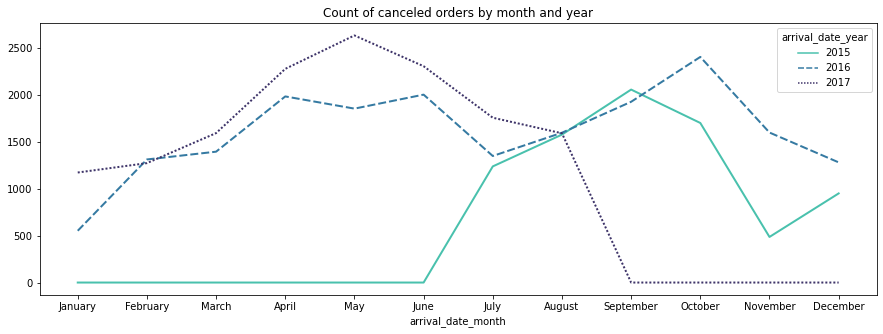

In [29]:
canceled_by_month_year = canceled_by_month_year.reindex(calendar.month_name[1:])
plt.figure(figsize=(15, 5));
plt.title("Count of canceled orders by month and year");
sns.lineplot(data=canceled_by_month_year, palette="mako_r", linewidth=2);

Look at the data by each month

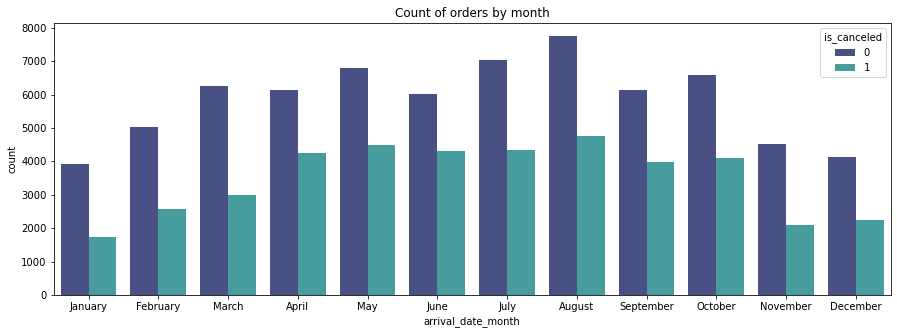

In [30]:
plt.figure(figsize=(15, 5));
plt.title("Count of orders by month");
sns.countplot(data.arrival_date_month, hue=data.is_canceled, palette="mako", order=calendar.month_name[1:]);

In [31]:
perc_canceled_for_cols(data, "arrival_date_month")

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
0,59.03,61.94,64.96,66.11,69.43,61.81,58.31,67.71,60.24,68.42,61.63,60.61
1,40.97,38.06,35.04,33.89,30.57,38.19,41.69,32.29,39.76,31.58,38.37,39.39


Most canceled - April, less canceled - January, but we have NaN in first half of 2015 and second half 2017, so look at the data by 2016

In [32]:
perc_canceled_for_cols(data[data.arrival_date_year==2016], "arrival_date_month")

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
0,61.54,63.88,64.03,64.71,74.52,66.22,60.05,69.14,64.68,62.89,58.92,62.22
1,38.46,36.12,35.97,35.29,25.48,33.78,39.95,30.86,35.32,37.11,41.08,37.78


So January canceled less than other, the most canceled months - October, June, April

In [33]:
data_info(data, True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
unique_value_1,City Hotel,0,0,2016,August,33,17,0,2,2,0,BB,PRT,Online TA,0,0,0,A,0,No Deposit,0,Transient,62,0,0
unique_value_2,Resort Hotel,1,1,2017,July,18,5,2,1,1,1,HB,GBR,Offline TA/TO,1,1,1,D,1,Non Refund,39,Transient-Party,90,1,1
type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,int32,object,object,object,int64,int64,int64,object,int64,object,int64,object,int32,int64,int64
num_unique,2,2,479,3,12,53,31,15,31,2,6,5,175,7,2,15,73,9,19,3,127,4,368,5,6
is_na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Look at the other columns in DF

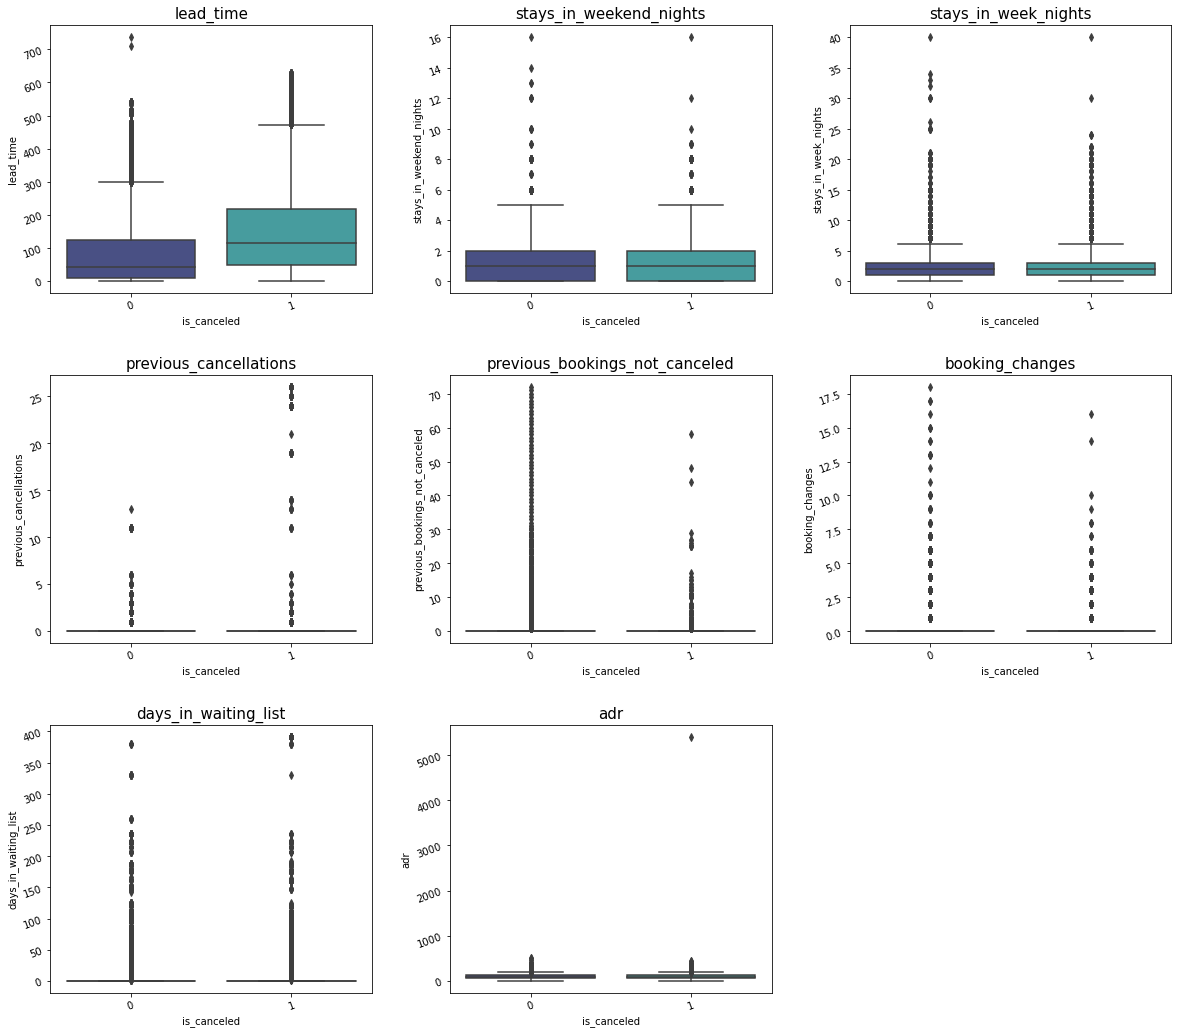

In [34]:
columns_for_visual_2 = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights",
                        "previous_cancellations", "previous_bookings_not_canceled", 
                      "booking_changes", "days_in_waiting_list", "adr"]
fig = plt.figure(figsize=(17,15))
for index, col in enumerate(columns_for_visual_2):
    ax = fig.add_subplot(3, 3, index+1)
    ax.set_title(col,fontsize=15)
    ax.tick_params(labelrotation=20)
    sns.boxplot(data.is_canceled, data[col], ax=ax, palette="mako")
plt.tight_layout(pad=3);

In [35]:
# The most intresting column - "lead_time"
print(f"Median of days (from booking to arrive) = {round(data[data.is_canceled==1].lead_time.median())} for canceled orders \n\
Median of days (from booking to arrive) = {round(data[data.is_canceled==0].lead_time.median())} for not canceled orders")

Median of days (from booking to arrive) = 115 for canceled orders 
Median of days (from booking to arrive) = 44 for not canceled orders



Also we can see strong outliers in columns "adr" and "days_in_waiting_list"

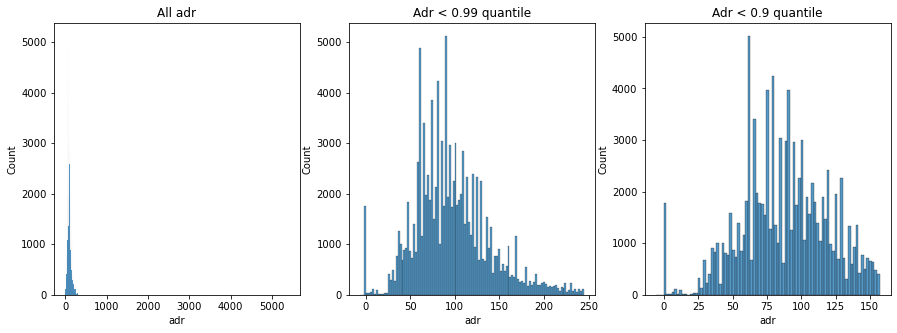

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5));
sns.histplot(data.adr, ax=ax[0]);
sns.histplot(data[data.adr<data.adr.quantile(0.99)].adr, ax=ax[1]);
sns.histplot(data[data.adr<data.adr.quantile(0.9)].adr, ax=ax[2]);
ax[0].set_title("All adr");
ax[1].set_title("Adr < 0.99 quantile");
ax[2].set_title("Adr < 0.9 quantile");

In [37]:
# drop outliers and check data
data.adr.clip(0, data.adr.quantile(0.99), inplace=True)
data.days_in_waiting_list.clip(0, data.days_in_waiting_list.quantile(0.99), inplace=True)

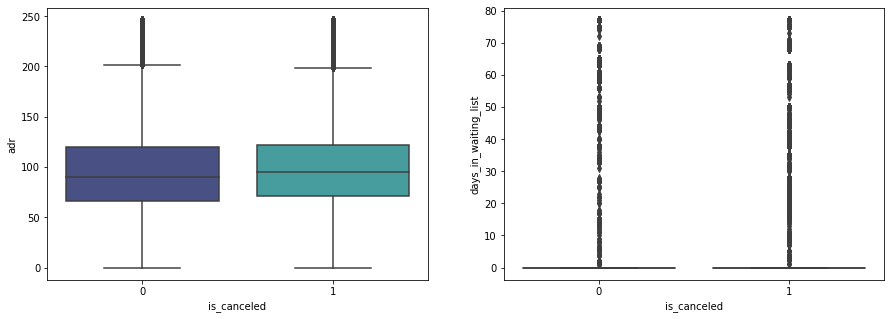

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data.is_canceled, data.adr, palette="mako", ax=ax[0]);
sns.boxplot(data.is_canceled, data.days_in_waiting_list, palette="mako", ax=ax[1]);

In [39]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,A,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,A,0,No Deposit,0,Transient,98.0,0,1


In [40]:
data.drop_duplicates(inplace=True)
size_of_df(data)

| 79281 rows, 25 columns 
| 1982025 elements summary 
| 15.4 Mb


In [41]:
data_info(data, True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
unique_value_1,City Hotel,0,0,2016,August,33,2,0,1,2,0,BB,PRT,Online TA,0,0,0,A,0,No Deposit,0,Transient,80.000000,0,0
unique_value_2,Resort Hotel,1,1,2017,July,34,17,2,2,1,1,SC,GBR,Offline TA/TO,1,1,1,D,1,Non Refund,77,Transient-Party,0.000000,1,1
type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,int32,object,object,object,int64,int64,int64,object,int64,object,int64,object,float64,int64,int64
num_unique,2,2,479,3,12,53,31,15,31,2,6,5,175,7,2,15,73,9,19,3,74,4,246,5,6
is_na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Predict cancelations

In [42]:
data = pd.get_dummies(data)

In [43]:
X = data.drop("is_canceled", axis=1)
y = data.is_canceled

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)

In [45]:
X_train.shape, X_test.shape

((55496, 233), (23785, 233))

In [46]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
results = pd.DataFrame(columns=['Model','Test_Score','CV Mean','CV STDEV'])
ensemble_models= {}
def save(model, modelname):
    global results
    # Once best model is found, establish more evaluation metrics.
    model.best_estimator_.fit(X_train, y_train)
    scores = cross_val_score(model.best_estimator_, X_train, y_train, cv=5,
                             scoring='roc_auc', verbose =0)
    CV_scores = scores.mean()
    STDev = scores.std()
    Test_scores = model.score(X_test, y_test)

    # CV and Save scores
    results = results.append({'Model': modelname,'Test_Score': Test_scores,
                             'CV Mean':CV_scores, 'CV STDEV': STDev}, ignore_index=True)
    ensemble_models[modelname] = model.best_estimator_
    
    # Print Evaluation
    print("\nEvaluation Method: {}".format("roc_auc"))
    print("Train CV RocAuc Score: %0.2f (+/- %0.2f) [%s]" % (CV_scores, STDev, modelname))
    print('Test_Score:', Test_scores)
        
    # Scikit Confusion Matrix
    model.best_estimator_.fit(X_train, y_train)
    pred = model.predict(X_test)
    skplt.metrics.plot_confusion_matrix(y_test, pred, title="{} Confusion Matrix".format(modelname),
                normalize=True,figsize=(6,6),text_fontsize='large')
    plt.show()

# ROC Curve Plot
# http://scikit-plot.readthedocs.io/en/stable/metrics.html
def eval_plot(model):
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test))
    plt.show()

#### Random Forest

In [48]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rfc = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = parameters, scoring="roc_auc", 
                               n_iter = 20, cv = 3, verbose=2, random_state=22, n_jobs = -1)

In [49]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=22, scoring='roc_auc', verbose=2)

In [50]:
rf_random.best_estimator_, rf_random.best_score_

(RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=10,
                        n_estimators=500),
 0.8949816311256956)


Evaluation Method: roc_auc
Train CV Accuracy: 0.90 (+/- 0.00) [RandomForest]
Test_Score: 0.8985228525781163


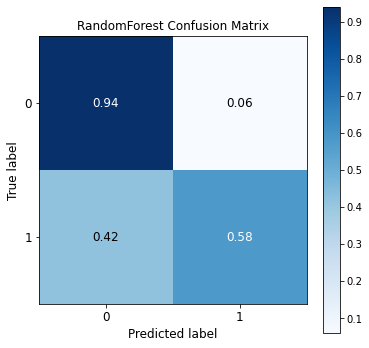

In [51]:
save(rf_random, "RandomForest")

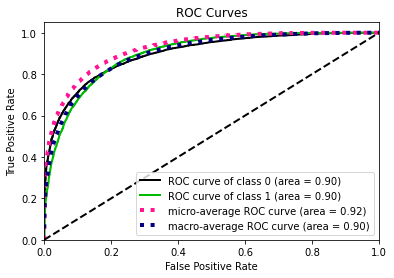

In [78]:
eval_plot(rf_random)

#### Linear SVC

In [52]:
penalty = ["l1", "l2"]
C = [0.1, 0.5, 1, 10, 20, 50, 100]

parameters = {'penalty': penalty,
               'C': C}
lsvc = LinearSVC()
lsvc_random = RandomizedSearchCV(estimator = lsvc, param_distributions = parameters, scoring="roc_auc", 
                               n_iter = 100, cv = 3, verbose=2, random_state=22, n_jobs = -1)

In [53]:
lsvc_random.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


RandomizedSearchCV(cv=3, estimator=LinearSVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 1, 10, 20, 50, 100],
                                        'penalty': ['l1', 'l2']},
                   random_state=22, scoring='roc_auc', verbose=2)

In [54]:
lsvc_random.best_estimator_, lsvc_random.best_score_

(LinearSVC(C=0.1), 0.8340906521466397)


Evaluation Method: roc_auc
Train CV Accuracy: 0.83 (+/- 0.00) [LinearSVC]
Test_Score: 0.8305002307190494


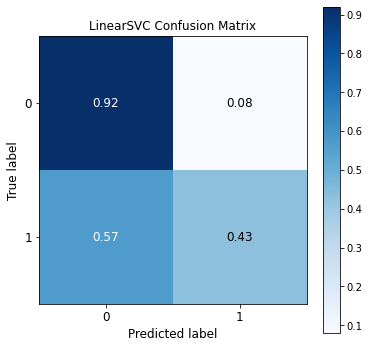

In [56]:
save(lsvc_random, "LinearSVC")

#### Logistic Regression

In [57]:
penalty = ['l1', 'l2', 'elasticnet']
C = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear']

parameters = {'penalty': penalty,
               'C': C, 
               'solver': solver}
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = parameters, scoring="roc_auc", 
                               n_iter = 100, cv = 3, verbose=2, random_state=22, n_jobs = -1)

In [58]:
lr_random.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=22, scoring='roc_auc', verbose=2)

In [59]:
lr_random.best_estimator_, lr_random.best_score_

(LogisticRegression(C=100, solver='newton-cg'), 0.8361556218115928)


Evaluation Method: roc_auc
Train CV Accuracy: 0.84 (+/- 0.00) [LogisticRegression]
Test_Score: 0.8332907777126506


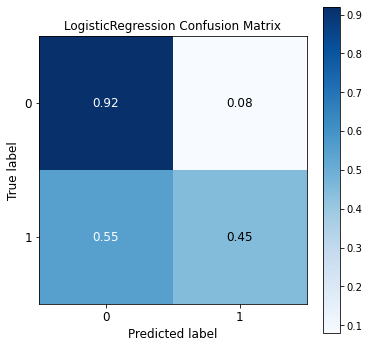

In [60]:
save(lr_random, "LogisticRegression")

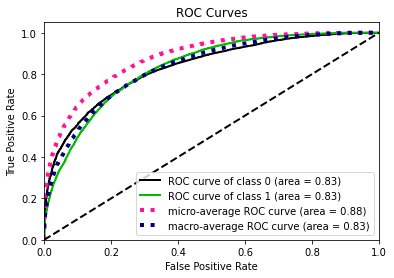

In [86]:
skplt.metrics.plot_roc_curve(y_test, lr_random.predict_log_proba(X_test))
plt.show()

#### Ridge Classifier

In [61]:
alpha = np.arange(0, 1, 0.1)
parameters = {'alpha': alpha}
lc = RidgeClassifier()
lc_random = RandomizedSearchCV(estimator = lc, param_distributions = parameters, scoring="roc_auc",
                               n_iter = 100, cv = 3, verbose=2, random_state=22, n_jobs = -1)

In [62]:
lc_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RidgeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=22, scoring='roc_auc', verbose=2)

In [63]:
lc_random.best_estimator_, lc_random.best_score_

(RidgeClassifier(alpha=0.8), 0.8268878693898459)

In [64]:
lc_random.cv_results_['mean_test_score']

array([0.80650755, 0.8268818 , 0.82688301, 0.82688395, 0.82688465,
       0.82688533, 0.82688608, 0.8268865 , 0.82688787, 0.82688747])


Evaluation Method: roc_auc
Train CV Accuracy: 0.83 (+/- 0.00) [RidgeClassifier]
Test_Score: 0.8228532361145647


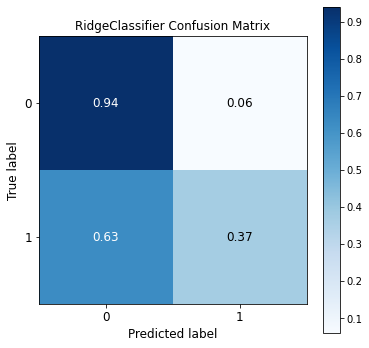

In [65]:
save(lc_random, "RidgeClassifier")

#### Bagging Classifier

In [66]:
n_estimators = [10, 100, 500]
parameters = {'n_estimators': n_estimators}
bc = BaggingClassifier()
bc_random = RandomizedSearchCV(estimator = bc, param_distributions = parameters, scoring="roc_auc",
                               n_iter = 50, cv = 3, verbose=2, random_state=22, n_jobs = -1)

In [67]:
bc_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=BaggingClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_estimators': [10, 100, 500]},
                   random_state=22, scoring='roc_auc', verbose=2)

In [68]:
bc_random.best_estimator_, bc_random.best_score_

(BaggingClassifier(n_estimators=500), 0.888633391343006)


Evaluation Method: roc_auc
Train CV Accuracy: 0.89 (+/- 0.00) [BaggingClassifier]
Test_Score: 0.8943551694512766


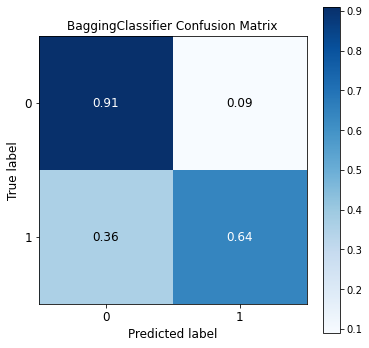

In [69]:
save(bc_random, "BaggingClassifier")

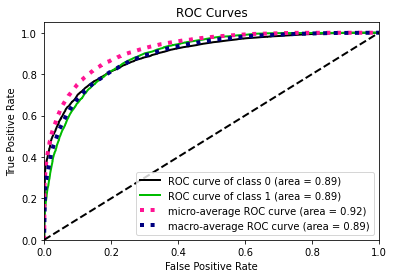

In [76]:
eval_plot(bc_random)

#### XGBClassifier

In [70]:
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15]
gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ]
parameters = {'learning_rate': learning_rate,
             'max_depth': max_depth,
             'gamma': gamma,
             'colsample_bytree': colsample_bytree}
xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = parameters, scoring="roc_auc",
                               n_iter = 50, cv = 3, verbose=2, random_state=22, n_jobs = -1)

In [71]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[00:40:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [72]:
xgb_random.best_estimator_, xgb_random.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=12,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 0.9003834295961868)

[00:41:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:42:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

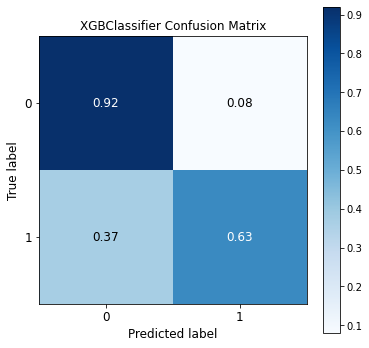

In [73]:
save(xgb_random, "XGBClassifier")

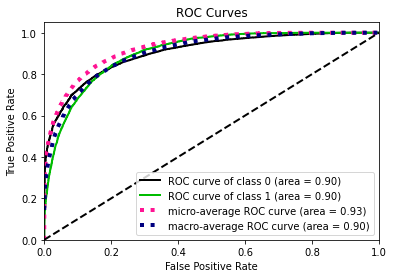

In [75]:
eval_plot(xgb_random)

In [74]:
results

,Model,Test_Score,CV Mean,CV STDEV
0,RandomForest,0.898523,0.896764,0.003589
1,LinearSVC,0.830500,0.834131,0.003513
2,LogisticRegression,0.833291,0.836258,0.003509
3,RidgeClassifier,0.822853,0.827045,0.003442
4,BaggingClassifier,0.894355,0.890812,0.003395
5,XGBClassifier,0.903787,0.902348,0.003184


In [92]:
from sklearn.metrics import f1_score
predict = xgb_random.predict(X_test)
f1_score(y_test, predict)

0.6845817937520994

In [93]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.775706407232818